Image format: JPEG
Image mode: RGB
Image size: (400, 400)


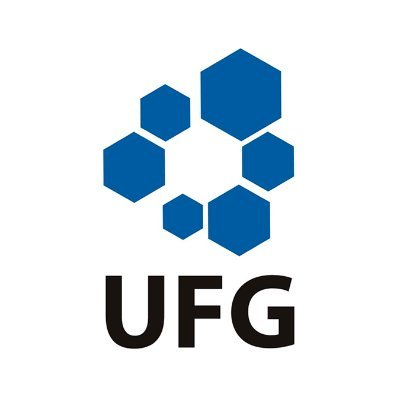

In [109]:
from PIL import Image

image = Image.open("ufg_logo.jpg")

print(f"Image format: {image.format}")
print(f"Image mode: {image.mode}")
print(f"Image size: {image.size}")

display(image)

In [110]:
width = 50
length = 50

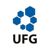

In [111]:
image = image.resize((width, length))
display(image)

In [112]:
import numpy as np
# Convert the image to a NumPy array
pixel_array = np.array(image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

Shape of pixel_array: (50, 50, 3)


In [113]:
pixel_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

Shape of pixel_array: (50, 50)


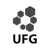

In [114]:
# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the grayscale image to a NumPy array
pixel_array = np.array(gray_image)

# You can now work with pixel_array as a NumPy array
print("Shape of pixel_array:", pixel_array.shape)

# Display the resized image in the notebook
display(gray_image)

In [115]:
width, length = pixel_array.shape
width, length

(50, 50)

In [116]:
def generate_random_individual(width, length):
    size = width * length
    binary_numbers = np.random.randint(0, 2, size=(size, 8), dtype=np.uint8) #binary number str
    binary_representation = ''.join(binary_numbers.ravel().astype(str))
    return binary_representation

In [117]:
individual = generate_random_individual(width, length)
individual

'100101101011000000110001110011010111010011110101010000110111100011010111101101110001111100001000001101001111011011110010001010101010010010111000001101101001111000001000010010101010100010001000001100101010001001110010011011100110000111100101100000000001001000101000010100100001010011111011111001000010101111100111110100011000010110101110111000111001110000110000010100001100010011100101010001000001100001101001000000001011011100110111111100100011110001111110111100101010100111000110010000110101101001101011101101001010010111101000110100100011101010101001001100101100100110010000000101101111011111010100110011101100010101010110011010011001101011100001101010010001101110101010100011101111010011011100110100111101011110100111101000100111111010001111101111101101010001110100010101000100110110110111110011101000111000010110100100111100000000111100111100111100110011101100111011101011010101111111101110001110101010000010100100110010101010001001010010111101000101000000111001011010110111000000001101111000111

In [118]:
import numpy as np

def individual_to_array(binary_representation, width, length):
    size = width * length
    binary_length = 8
    assert len(binary_representation) == size * binary_length, "Invalid binary representation length"

    # Split the binary string into 8-character chunks
    binary_chunks = [binary_representation[i:i+binary_length] for i in range(0, size * binary_length, binary_length)]

    # Convert binary chunks to integers using int('11111111', 2)
    integers = [int(chunk, 2) for chunk in binary_chunks]

    # Create a numpy array from the integers
    array = np.array(integers, dtype=np.uint8).reshape(width, length)

    return array


In [119]:

binary_representation = generate_random_individual(width, length)
array = individual_to_array(individual, width, length)

In [120]:
def display_individual(individual):
    img = Image.fromarray(np.uint8(individual))
    display(img)

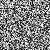

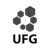

In [121]:
display_individual(array)
display_individual(pixel_array)

In [122]:
import numpy as np

def fitness_function(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    # Initialize the score to 0
    score = 0
    # Iterate over the elements of both arrays
    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1

    return score

In [123]:
score = fitness_function(array, pixel_array)
print("Score:", score)

Score: 15


In [124]:
#TODO:
#Test altering the fitness function
#Rows and columns +20
# log(score) or exp(score)

In [125]:
def fitness_function2(array1, array2):
    if array1.shape != array2.shape:
        raise ValueError("Arrays must have the same shape for comparison")
    score = 0

    for i in range(array1.shape[0]):
        for j in range(array1.shape[1]):
            if array1[i, j] == array2[i, j]:
                score += 1
    # Check if entire rows match and increment the score by 20 points
    for i in range(array1.shape[0]):
        if np.array_equal(array1[i], array2[i]):
            score += 20
    # Check if entire columns match and increment the score by 20 points
    for j in range(array1.shape[1]):
        if np.array_equal(array1[:, j], array2[:, j]):
            score += 20
            
    return score

In [126]:
array_list = []
for i in range(300):
    binary_representation = generate_random_individual(width, length)
    array = individual_to_array(individual, width, length)
    array_list.append(array)

In [ ]:
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def string_to_image(text, image_size=(500, 100), font_size=20):
    # Create a new image with a white background
    image = IMG.new("RGB", image_size, "white")
    draw = ImageDraw.Draw(image)

    # You can customize the font and its size
    font = ImageFont.truetype("arial.ttf", font_size)

    # Calculate the text size and position it in the center
    text_width, text_height = draw.textsize(text, font)
    x = (image_size[0] - text_width) / 2
    y = (image_size[1] - text_height) / 2

    # Draw the text on the image
    draw.text((x, y), text, fill="black", font=font)

    return image

In [127]:
import imageio.v2 as imageio
from IPython.display import display, Image
from PIL import ImageDraw, ImageFont
from PIL import Image as IMG
import os

def generate_GIF(array_list):
    image_folder = "temp_images"
    os.makedirs(image_folder, exist_ok=True)

    image_files = []

    for i, array in enumerate(array_list):
        image = IMG.fromarray(np.uint8(array))
        image_file = os.path.join(image_folder, f"image_{i}.png")
        image.save(image_file)
        image_files.append(image_file)



    output_gif = "output_image.gif"
    images = [imageio.imread(image_file) for image_file in image_files]
    imageio.mimsave(output_gif, images, duration=500)  # Set the duration (in seconds) per frame

    # Clean up temporary image files
    for image_file in image_files:
        os.remove(image_file)

    #print(f"GIF saved to {output_gif}")


    # Path to your GIF file
    gif_path = "output_image.gif"

    # Display the GIF
    display(Image(filename=gif_path))

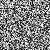

In [128]:
generate_GIF(array_list)